# Disturbance Performance Visualization

In [1]:
import torch
import matplotlib.pyplot as plt
from Utils import ID_generator
from Comparison_models import MGP_BDI, MHGP_BC, MHGP_BDI, UGP_BDI, UHGP_BC, UHGP_BDI
plt.style.use("ggplot")

## Table-sweep task

In [2]:
mhgp_bdi = MHGP_BDI(dir_path=None)
mgp_bdi = MGP_BDI(dir_path=None)
uhgp_bdi = UHGP_BDI(dir_path=None)
mhgp_bc = MHGP_BC(dir_path=None)

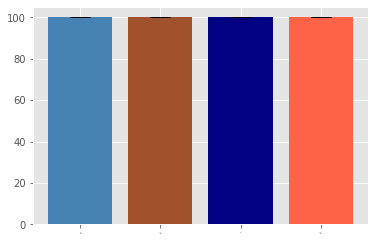

In [3]:
ID = ID_generator().now_stamp()
bar_uhgp_bdi = plt.bar(['Uni\nBDI'],[100.],yerr=0.,capsize = 10,color=uhgp_bdi.color)
bar_mgp_bdi = plt.bar(['Homo\nBDI'],[100.],yerr=0.,capsize = 10,color=mgp_bdi.color)
bar_mhgp_bc = plt.bar(['BC'],[100.],yerr=0.,capsize = 10,color=mhgp_bc.color)
bar_mhgp_bdi = plt.bar(['Hetero\nBDI'],[100.],yerr=0.,capsize = 10,color=mhgp_bdi.color)
plt.xticks(fontsize=0)
plt.savefig("/Users/hanbit-o/code/Visualization_wall_avoidance_results/Figures/SweepObject/Disturbance_Performance/"+ID+".pdf")

## ObstacleAvoidance

In [4]:
mhgp_bdi = MHGP_BDI(
    dir_path="/Users/hanbit-o/code/Visualization_wall_avoidance_results/Data/Result/ObstacleAvoidance/MHGP-BDI/0")
mhgp_bdi.demo_results(ID="0/20210908_201619")

# uhgp_bdi = UHGP_BDI(
#     dir_path="/Users/hanbit-o/code/Visualization_wall_avoidance_results/Data/Result/ObstacleAvoidance/UHGP-BDI/0")
# uhgp_bdi.demo_results(ID="0/20210908_201619")

mgp_bdi = MGP_BDI(
    dir_path="/Users/hanbit-o/code/Visualization_wall_avoidance_results/Data/Result/ObstacleAvoidance/MGP-BDI/0")
mgp_bdi.demo_results(ID="0/20210908_201008")

ugp_bdi = UGP_BDI(
    dir_path="/Users/hanbit-o/code/Visualization_wall_avoidance_results/Data/Result/ObstacleAvoidance/UGP-BDI/0")
ugp_bdi.demo_results(ID="0/20210929_141804")


mhgp_bc = MHGP_BC(dir_path=None)
uhgp_bc = UHGP_BC(dir_path=None)

dict_keys(['test_results', 'success_rate', 'Trajectories'])
dict_keys(['test_results', 'success_rate', 'Trajectories'])
dict_keys(['test_results', 'success_rate', 'Trajectories'])


In [5]:
print(mhgp_bdi.success_rate)
print(mgp_bdi.success_rate)
print(ugp_bdi.success_rate)

{'mean': tensor(100.), 'std': tensor(0.)}
{'mean': tensor(40.), 'std': tensor(28.2843)}
{'mean': tensor(0.), 'std': tensor(0.)}


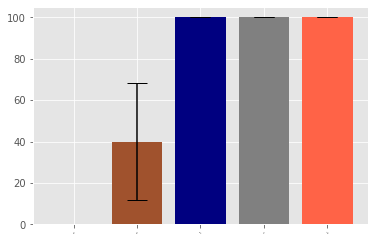

In [6]:
ID = ID_generator().now_stamp()
bar_mgp_bdi = plt.bar(['Uni\nBDI'],[ugp_bdi.success_rate['mean']],yerr=ugp_bdi.success_rate['std'],capsize = 10,color=ugp_bdi.color)
bar_mgp_bdi = plt.bar(['Homo\nBDI'],[mgp_bdi.success_rate['mean']],yerr=mgp_bdi.success_rate['std'],capsize = 10,color=mgp_bdi.color)
bar_mhgp_bc = plt.bar(['MHGP\nBC'],[100.],yerr=0.,capsize = 10,color=mhgp_bc.color)
bar_uhgp_bc = plt.bar(['UHGP\nBC'],[100.],yerr=0.,capsize = 10,color=uhgp_bc.color)
bar_mhgp_bdi = plt.bar(['Hetero\nBDI'],[mhgp_bdi.success_rate['mean']],yerr=mhgp_bdi.success_rate['std'],capsize = 10,color=mhgp_bdi.color)
plt.xticks(fontsize=0)
plt.savefig("/Users/hanbit-o/code/Visualization_wall_avoidance_results/Figures/Obstacle_Avoidance/Disturbance_Performance/"+ID+".pdf")

## ShaftInsertion

In [7]:
mhgp_bdi = MHGP_BDI(
dir_path="/Users/hanbit-o/code/Visualization_wall_avoidance_results/Data/Result/ShaftInsertion/MHGP-BDI/0")
mhgp_bdi.demo_results(ID="2/20210908demo/20210908_181345demo/_random")

# uhgp_bdi = UHGP_BDI(
# dir_path="/Users/hanbit-o/code/Visualization_wall_avoidance_results/Data/Result/ShaftInsertion/UHGP-BDI/0")
# uhgp_bdi.demo_results(ID="2/20210908demo/20210908_181345demo/_random")

mgp_bdi = MGP_BDI(
    dir_path="/Users/hanbit-o/code/Visualization_wall_avoidance_results/Data/Result/ShaftInsertion/MGP-BDI/0")
mgp_bdi.demo_results(ID="1/20210908_183147demo/_random")

ugp_bdi = UGP_BDI(
    dir_path="/Users/hanbit-o/code/Visualization_wall_avoidance_results/Data/Result/ShaftInsertion/UGP-BDI/0")
ugp_bdi.demo_results(ID="1/20210929_144732")

mhgp_bc = MHGP_BC(dir_path=None)
uhgp_bc = UHGP_BC(dir_path=None)



dict_keys(['test_results', 'success_rate', 'Trajectories'])
dict_keys(['test_results', 'success_rate', 'Trajectories'])
dict_keys(['test_results', 'success_rate', 'Trajectories'])


In [8]:
print(mhgp_bdi.success_rate)
print(mgp_bdi.success_rate)
print(ugp_bdi.success_rate)

{'mean': tensor(80.), 'std': tensor(28.2843)}
{'mean': tensor(20.), 'std': tensor(0.)}
{'mean': tensor(10.), 'std': tensor(14.1421)}


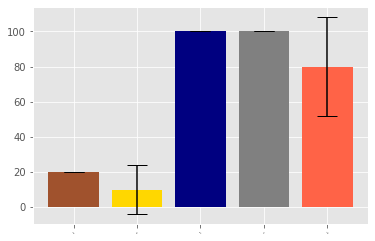

In [13]:
ID = ID_generator().now_stamp()
bar_mgp_bdi = plt.bar(['Homo\nBDI'],[mgp_bdi.success_rate['mean']],yerr=mgp_bdi.success_rate['std'],capsize = 10,color=mgp_bdi.color)
bar_ugp_bdi = plt.bar(['Uni\nBDI'],[ugp_bdi.success_rate['mean']],yerr=ugp_bdi.success_rate['std'],capsize = 10,color=ugp_bdi.color)
bar_mhgp_bc = plt.bar(['MHGP\nBC'],[100.],yerr=0.,capsize = 10,color=mhgp_bc.color)
bar_uhgp_bc = plt.bar(['UHGP\nBC'],[100.],yerr=0.,capsize = 10,color=uhgp_bc.color)
bar_mhgp_bdi = plt.bar(['Hetero\nBDI'],[mhgp_bdi.success_rate['mean']],yerr=mhgp_bdi.success_rate['std'],capsize = 10,color=mhgp_bdi.color)
plt.xticks(fontsize=0)
plt.savefig("/Users/hanbit-o/code/Visualization_wall_avoidance_results/Figures/ShaftInsertion/Disturbance_Performance/"+ID+".pdf")